In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [95]:
from google.colab import files
uploaded = files.upload()

Saving survey.csv to survey (1).csv


In [96]:
data = pd.read_csv('survey.csv')

In [97]:
data.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [98]:
data.shape

(1259, 27)

In [99]:
data.isnull().sum()

,0
Timestamp,0
Age,0
Gender,0
Country,0
state,515
self_employed,18
family_history,0
treatment,0
work_interfere,264
no_employees,0


In [100]:
data = data.drop(columns = ['comments','state','Timestamp'])

In [101]:
data['self_employed'].unique()

array([nan, 'Yes', 'No'], dtype=object)

In [102]:
data['self_employed'] = data['self_employed'].replace(np.nan,"Don't No")

In [103]:
data['work_interfere'].unique()

array(['Often', 'Rarely', 'Never', 'Sometimes', nan], dtype=object)

In [104]:
data['work_interfere'] = data['work_interfere'].replace(np.nan,"Don't No")

In [105]:
data.isnull().sum()

,0
Age,0
Gender,0
Country,0
self_employed,0
family_history,0
treatment,0
work_interfere,0
no_employees,0
remote_work,0
tech_company,0


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   self_employed              1259 non-null   object
 4   family_history             1259 non-null   object
 5   treatment                  1259 non-null   object
 6   work_interfere             1259 non-null   object
 7   no_employees               1259 non-null   object
 8   remote_work                1259 non-null   object
 9   tech_company               1259 non-null   object
 10  benefits                   1259 non-null   object
 11  care_options               1259 non-null   object
 12  wellness_program           1259 non-null   object
 13  seek_help                  1259 non-null   object
 14  anonymit

In [107]:
data.dtypes

,0
Age,int64
Gender,object
Country,object
self_employed,object
family_history,object
treatment,object
work_interfere,object
no_employees,object
remote_work,object
tech_company,object


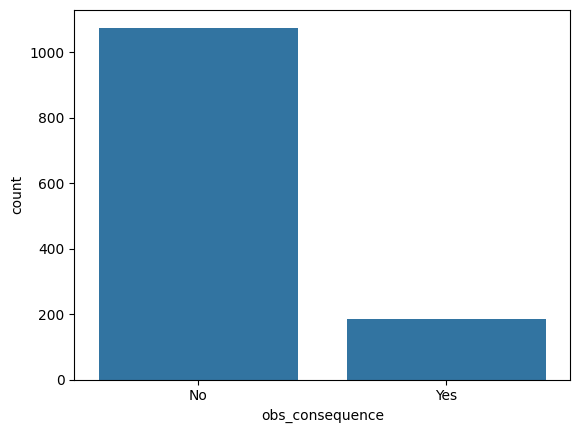

In [108]:
sns.countplot(x = data['obs_consequence'],data = data)
plt.show()

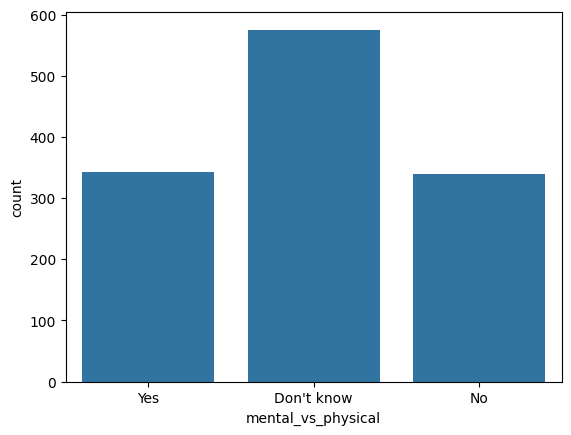

In [109]:
sns.countplot(x = data['mental_vs_physical'],data = data)
plt.show()

In [110]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['obs_consequence'] = le.fit_transform(data['obs_consequence'])
data['mental_vs_physical'] = le.fit_transform(data['mental_vs_physical'])

In [111]:
data.head()

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,Don't No,No,Yes,Often,6-25,No,Yes,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,2,0
1,44,M,United States,Don't No,No,No,Rarely,More than 1000,No,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,0,0
2,32,Male,Canada,Don't No,No,No,Rarely,6-25,No,Yes,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,1,0
3,31,Male,United Kingdom,Don't No,Yes,Yes,Often,26-100,No,Yes,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,1,1
4,31,Male,United States,Don't No,No,No,Never,100-500,Yes,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,0,0


In [112]:
data['self_employed'] = le.fit_transform(data['self_employed'])
data['family_history'] = le.fit_transform(data['family_history'])
data['treatment'] = le.fit_transform(data['treatment'])
data['work_interfere'] = le.fit_transform(data['work_interfere'])
data['remote_work'] = le.fit_transform(data['remote_work'])
data['tech_company'] = le.fit_transform(data['tech_company'])
data['anonymity'] = le.fit_transform(data['anonymity'])
data['leave'] = le.fit_transform(data['leave'])
data['mental_health_consequence'] = le.fit_transform(data['mental_health_consequence'])
data['phys_health_consequence'] = le.fit_transform(data['phys_health_consequence'])
data['coworkers'] = le.fit_transform(data['coworkers'])
data['supervisor'] = le.fit_transform(data['supervisor'])
data['mental_health_interview'] = le.fit_transform(data['mental_health_interview'])
data['phys_health_interview'] = le.fit_transform(data['mental_vs_physical'])

In [113]:
data.drop(columns=  ['no_employees','Gender'],inplace=True)

In [114]:
data.drop(columns = ['Country'], inplace=True)

In [115]:
data['benefits']=le.fit_transform(data['benefits'])
data['care_options']=le.fit_transform(data['care_options'])
data['wellness_program']=le.fit_transform(data['wellness_program'])
data['seek_help']=le.fit_transform(data['seek_help'])

In [116]:
data.duplicated().sum()

4

In [117]:
data.drop_duplicates(inplace=True)

In [118]:
data.describe()

,Age,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
count,1.255000e+03,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,...,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000
mean,7.968131e+07,1.101195,0.390438,0.505976,2.288446,0.299602,0.819124,1.054980,0.953785,1.031873,...,0.647809,1.411155,0.851793,0.832669,0.972908,1.099602,0.870916,0.814343,0.814343,0.145817
std,2.822787e+09,0.346028,0.488043,0.500164,1.595344,0.458266,0.385069,0.838282,0.865482,0.575084,...,0.909077,1.510158,0.767374,0.486550,0.620669,0.844605,0.427418,0.834724,0.834724,0.353063
min,-1.726000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.700000e+01,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,3.100000e+01,1.000000,0.000000,1.000000,3.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,3.600000e+01,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,0.000000
max,1.000000e+11,2.000000,1.000000,1.000000,4.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [119]:
cor = data.corr()

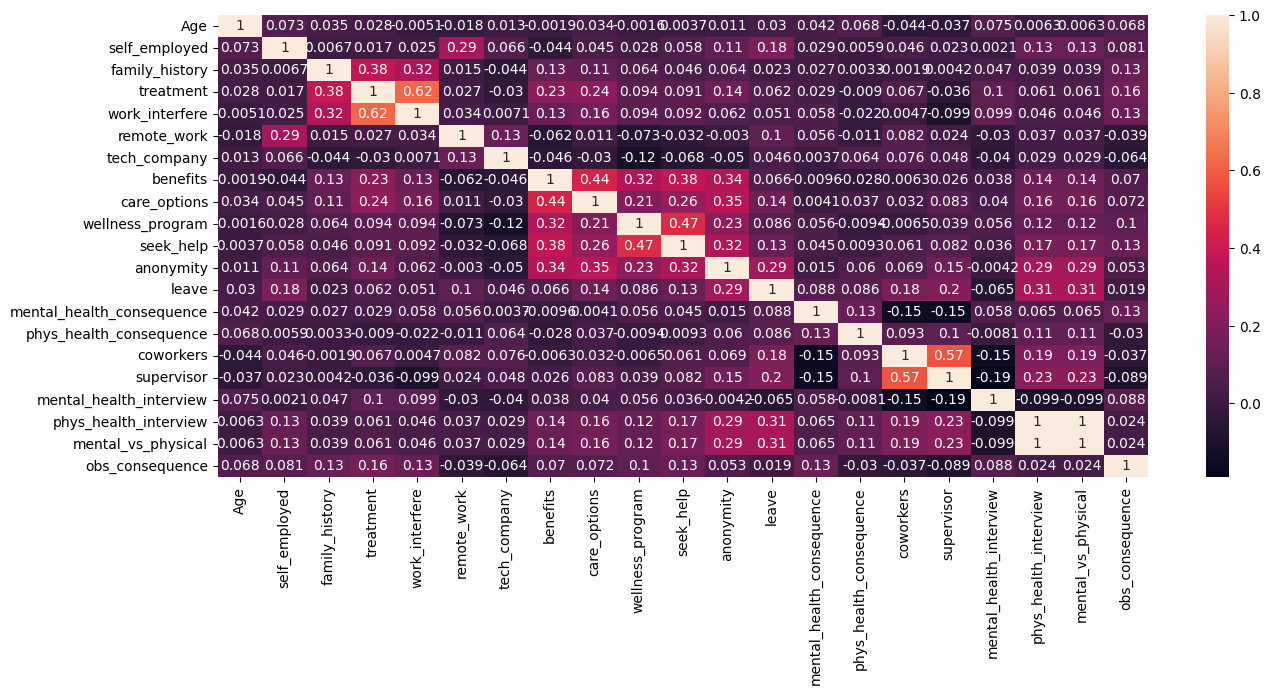

In [120]:
plt.figure(figsize=(15,6))
sns.heatmap(cor,annot=True)
plt.show()

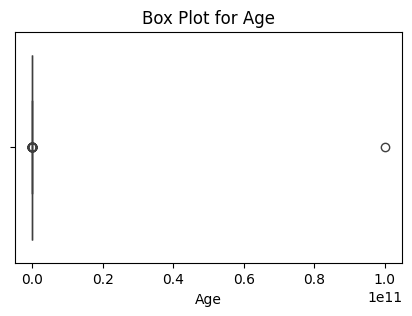

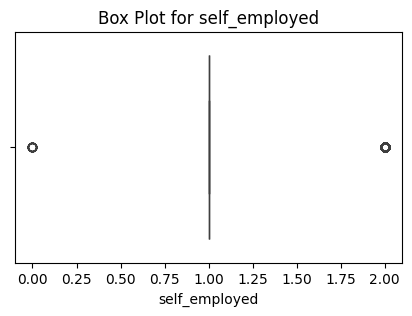

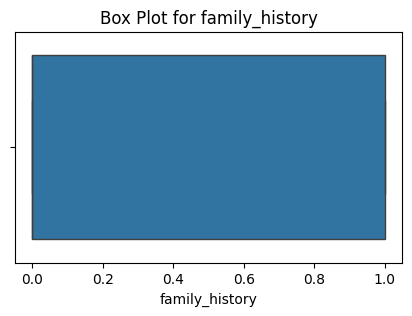

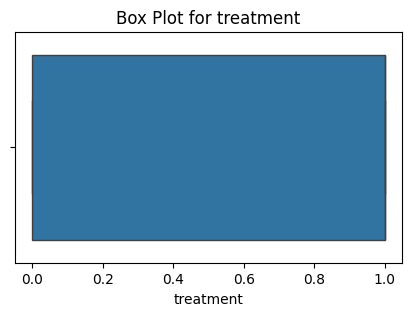

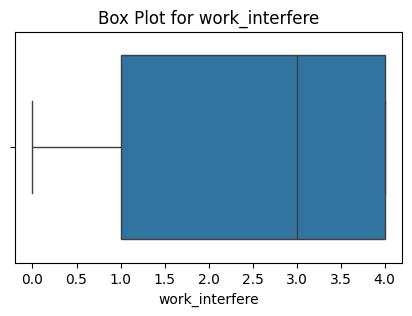

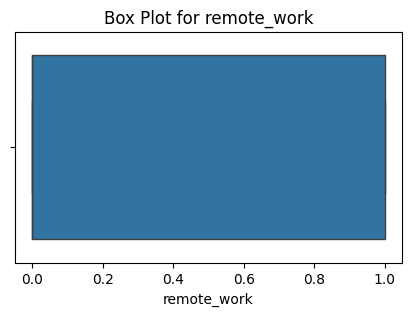

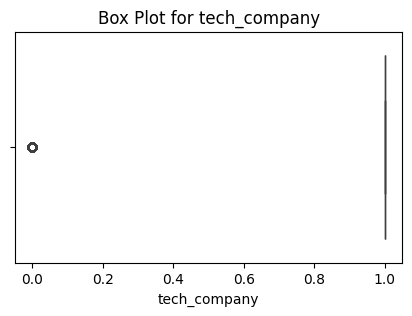

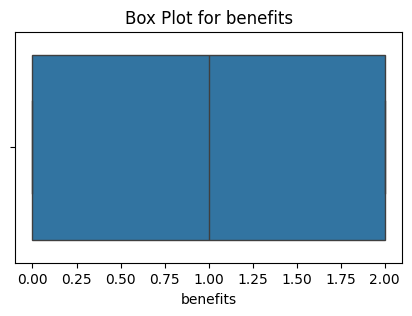

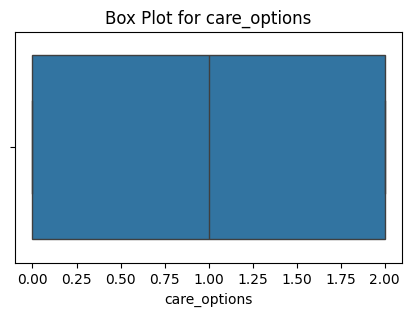

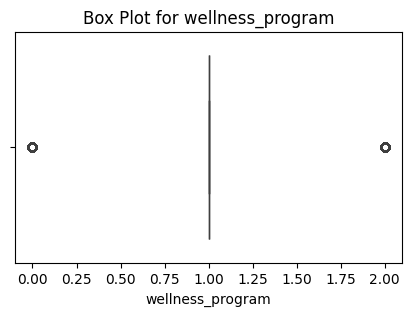

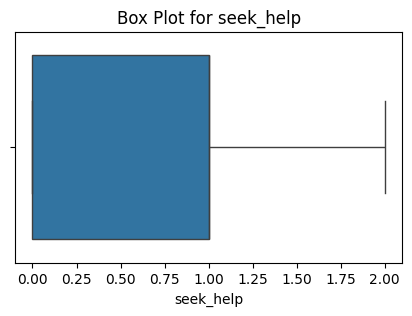

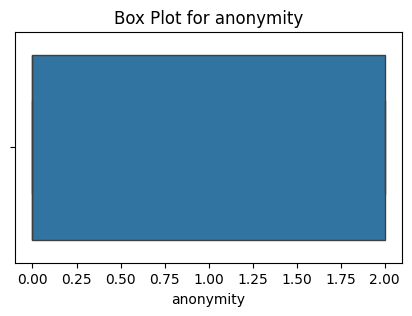

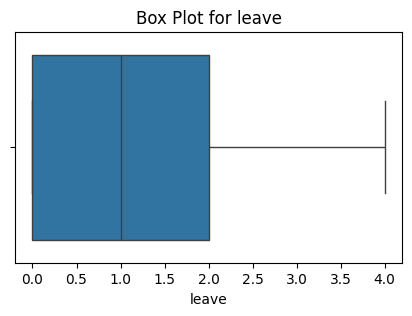

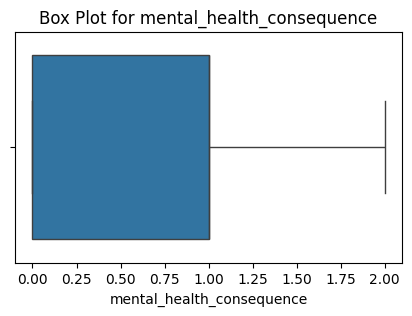

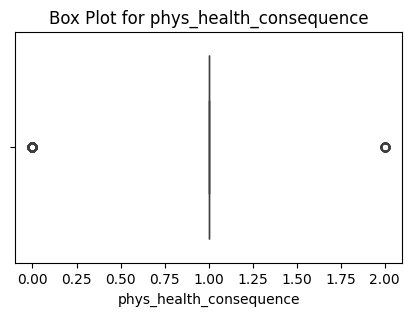

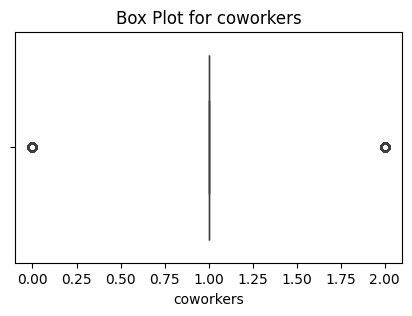

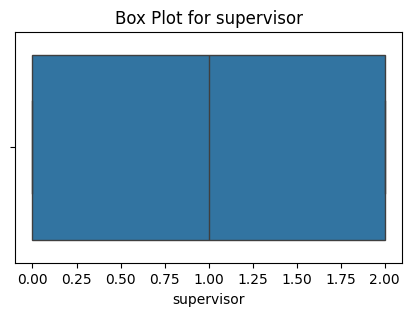

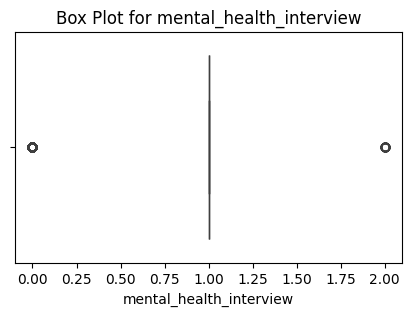

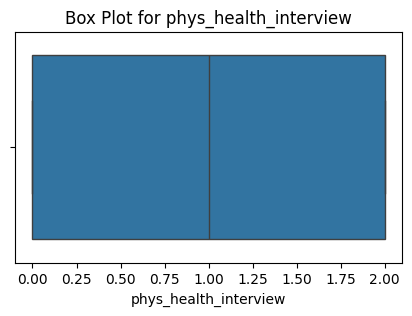

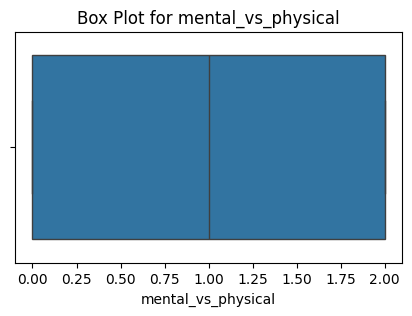

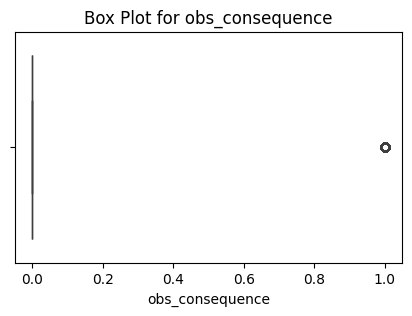

In [121]:
for column in data.columns:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=data[column])
    plt.title(f'Box Plot for {column}')
    plt.show()

In [122]:
data.head()

,Age,self_employed,family_history,treatment,work_interfere,remote_work,tech_company,benefits,care_options,wellness_program,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,0,0,1,2,0,1,2,1,1,...,2,2,1,1,1,2,1,2,2,0
1,44,0,0,0,3,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,32,0,0,0,3,0,1,1,0,1,...,0,1,1,1,2,2,2,1,1,0
3,31,0,1,1,2,0,1,1,2,1,...,1,1,2,2,1,0,0,1,1,1
4,31,0,0,0,1,1,1,2,0,0,...,0,0,1,1,1,2,2,0,0,0


In [123]:
X = data.drop(columns = ['mental_health_consequence'],axis = 1)
y = data['mental_health_consequence']

In [124]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [125]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression

In [126]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [127]:
y_pred = lr.predict(X_test)

In [128]:
from sklearn.metrics import *
print(accuracy_score(y_test, y_pred))

0.6374501992031872


In [129]:
y_score = lr.predict_proba(X_test)

#Compute Multi-Class ROC-AUC
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)  # Convert to one-hot encoding

roc_auc = roc_auc_score(y_test_bin, y_score, multi_class="ovr")
print("Multi-Class ROC-AUC Score:", roc_auc)


Multi-Class ROC-AUC Score: 0.7947711246103234


In [130]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.62      0.59        95
           1       0.73      0.70      0.72        98
           2       0.63      0.55      0.59        58

    accuracy                           0.64       251
   macro avg       0.64      0.63      0.63       251
weighted avg       0.64      0.64      0.64       251



In [131]:
X_train = X_train.astype(int)
X_test = X_test.astype(int)

  0%|          | 0/251 [00:00<?, ?it/s]

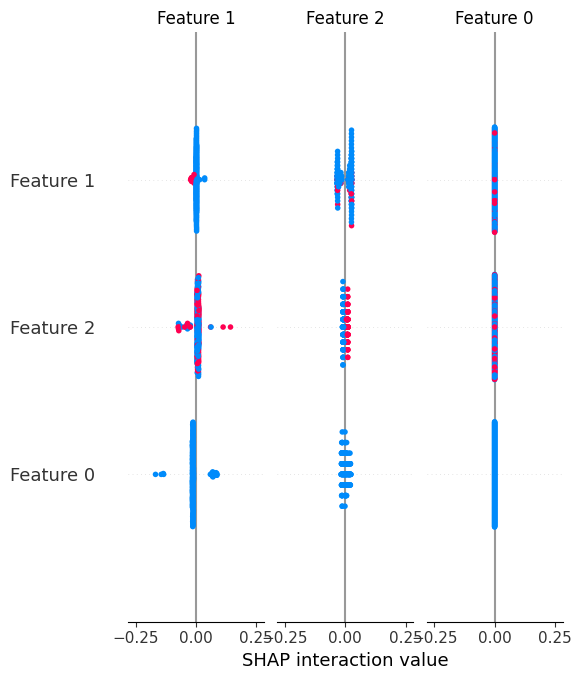

In [132]:
import shap
background = X_train[np.random.choice(X_train.shape[0], 50, replace=False)]

explainer = shap.KernelExplainer(lr.predict_proba, background)
shap_values = explainer.shap_values(X_test)  # Compute SHAP values

shap.summary_plot(shap_values, X_test)

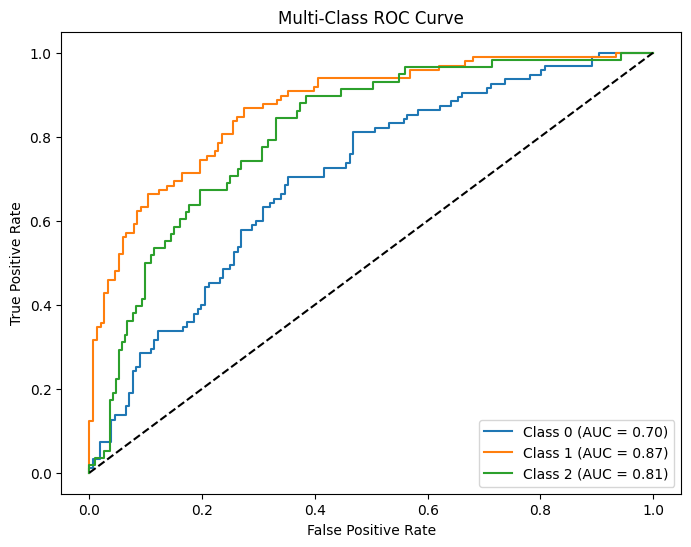

In [133]:
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(lb.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend()
plt.show()

### Random Forest

In [134]:
from sklearn.ensemble import RandomForestClassifier
rf_data=RandomForestClassifier(n_estimators=50,random_state=42)
rf_data.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [135]:
y_preda=rf_data.predict(X_test)

In [136]:
y_preda

array([1, 0, 0, 2, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1,
       1, 0, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 2, 0, 2, 2, 1, 1, 2, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1,
       1, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1,
       0, 2, 0, 0, 2, 1, 2, 0, 2, 0, 1, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2,
       1, 0, 1, 2, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 1, 1, 0, 0,
       2, 2, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       2, 0, 0, 1, 0, 1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       2, 1, 1, 2, 0, 2, 0, 1, 0])

In [137]:
accuracy_score(y_test,y_preda)

0.6135458167330677

In [138]:
y_scoree = rf_data.predict_proba(X_test)
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)  # Convert to one-hot encoding

roc_auc = roc_auc_score(y_test_bin, y_scoree, multi_class="ovr")
print("Multi-Class ROC-AUC Score:", roc_auc)

Multi-Class ROC-AUC Score: 0.7972098591294943


In [139]:
importances = rf_data.feature_importances_
print("Feature Importances:", importances)

Feature Importances: [0.         0.02548777 0.03975642 0.03544513 0.06626229 0.04155465
 0.03221402 0.05812567 0.06529161 0.04585068 0.0542699  0.03513539
 0.03852649 0.11620246 0.08016766 0.14276743 0.03534942 0.0278762
 0.03047816 0.02923864]


In [140]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preda))

              precision    recall  f1-score   support

           0       0.56      0.60      0.58        95
           1       0.67      0.69      0.68        98
           2       0.62      0.50      0.55        58

    accuracy                           0.61       251
   macro avg       0.61      0.60      0.60       251
weighted avg       0.61      0.61      0.61       251



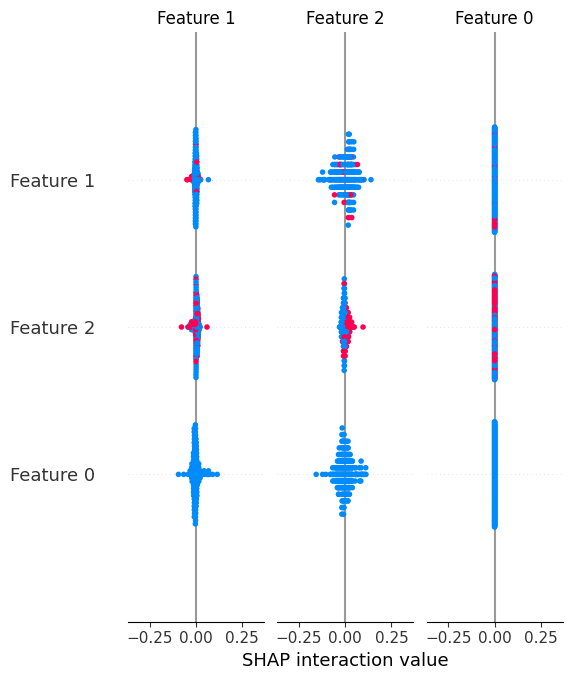

In [141]:
import shap

explainer = shap.TreeExplainer(rf_data)  # Use TreeExplainer for tree models
shap_values = explainer.shap_values(X_test)  # Get SHAP values

shap.summary_plot(shap_values, X_test)

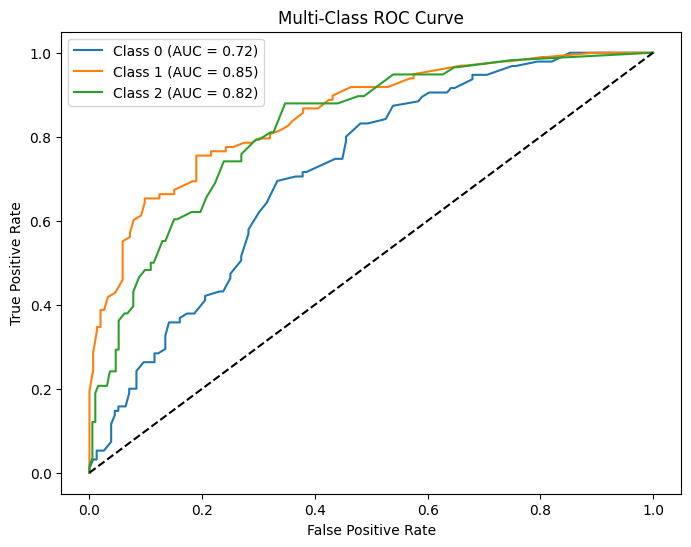

In [142]:
plt.figure(figsize=(8, 6))
for i, class_label in enumerate(lb.classes_):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_scoree[:, i])
    plt.plot(fpr, tpr, label=f"Class {class_label} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve")
plt.legend()
plt.show()

In [146]:
import joblib
joblib.dump(rf_data, "mental_health_model.pkl")
joblib.dump(sc, "scaler.pkl")
joblib.dump(le, "label_encoders.pkl")

print("\n Model and preprocessing objects saved successfully!")


 Model and preprocessing objects saved successfully!


In [149]:
import joblib
joblib.dump(lr, "mental_health_.pkl")
joblib.dump(sc, "scaler_.pkl")
joblib.dump(le, "label_encoders_.pkl")

print("\n Model and preprocessing objects saved successfully!")


 Model and preprocessing objects saved successfully!
